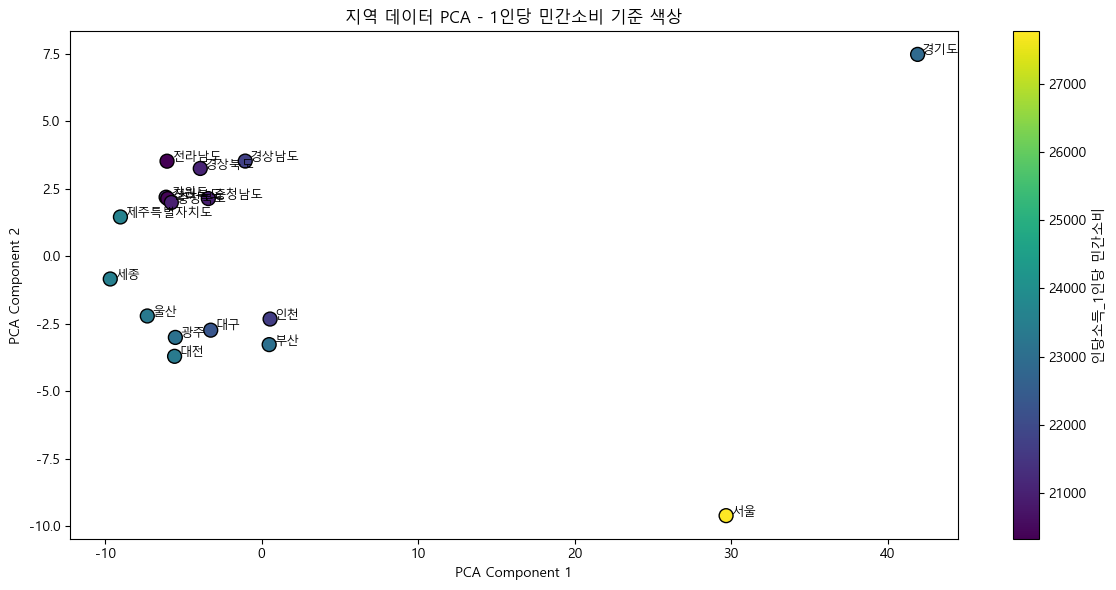

📌 PC1에 가장 크게 기여한 상위 10개 변수:
                                             PC1       PC2
프랜차이즈_합계_기타영업비용 (백만원)                   0.073891  0.005131
프랜차이즈_합계_인건비 (백만원)                      0.073890  0.003118
프랜차이즈_김밥 기타 간이음식점 및 포장 판매점_영업비용 (백만원)   0.073882  0.001739
프랜차이즈_합계_연간급여액 (백만원)                    0.073880  0.004303
프랜차이즈_김밥 기타 간이음식점 및 포장 판매점_매출액 (백만원)    0.073878  0.001701
프랜차이즈_제과점업_종사자수 (명)                     0.073873  0.006859
시군구_이동자수_기준병합_계_총전출                     0.073870  0.002766
프랜차이즈_피자 햄버거 샌드위치 및 유사 음식점업_영업비용 (백만원)  0.073863  0.000536
프랜차이즈_피자 햄버거 샌드위치 및 유사 음식점업_매출액 (백만원)   0.073863  0.003434
프랜차이즈_한식 음식점업_영업비용 (백만원)                0.073859  0.005165


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # macOS는 'AppleGothic', 리눅스는 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("통합데이터_출처정리완료.csv")  # 또는 경로 수정

# 불필요한 열 제거
drop_columns = [col for col in df.columns if '인구' in col or '삶에 대한 만족도' in col]
df = df.drop(columns=drop_columns)

# 지역명을 인덱스로
if '지역' in df.columns:
    df.set_index('지역', inplace=True)

# 목표 변수
target = '인당소득_1인당 민간소비'

# 결측치 제거
df = df.dropna(subset=[target])
df_numeric = df.select_dtypes(include='number').dropna()

# 정규화
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)

# PCA 수행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# 시각화
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df_numeric[target],
    cmap='viridis',
    s=100, edgecolor='k'
)

plt.title('지역 데이터 PCA - 1인당 민간소비 기준 색상')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label=target)

# 지역명 라벨링
for i, region in enumerate(df_numeric.index):
    plt.text(pca_result[i, 0]+0.3, pca_result[i, 1], region, fontsize=9)

# 이미지 저장
plt.tight_layout()
plt.savefig("pca_consumption_analysis_with_labels.png", dpi=300)
plt.show()

# 변수 영향력 분석
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_numeric.columns)
top10 = loadings.abs().sort_values(by='PC1', ascending=False).head(10)

# 결과 출력
print("📌 PC1에 가장 크게 기여한 상위 10개 변수:")
print(top10)
